In [2]:
# First it is needed to install the packages:
# install.packages("readxl")
# install.packages("dplyr")
# install.packages("rworldmap")
# install.packages("ggplot2")
# install.packages("reshape2")
# install.packages("ggthemes")
library("readxl")
library("dplyr")
library("rworldmap")
library("ggplot2")
library("reshape2")
library("RColorBrewer")
library("ggthemes")
library("stringr")

data <- read_excel("data_cleaned.xlsx", col_names = FALSE)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...



,number,countries
,<dbl>,<chr>
...1,1,Andorra
...2,3,Argentina
...3,5,Australia
...4,3,Austria
...5,1,Bangladesh
...6,2,Belarus
...7,1,Belgium
...8,1,Bolivia
...9,9,Brazil


58 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
185 codes from the map weren't represented in your data


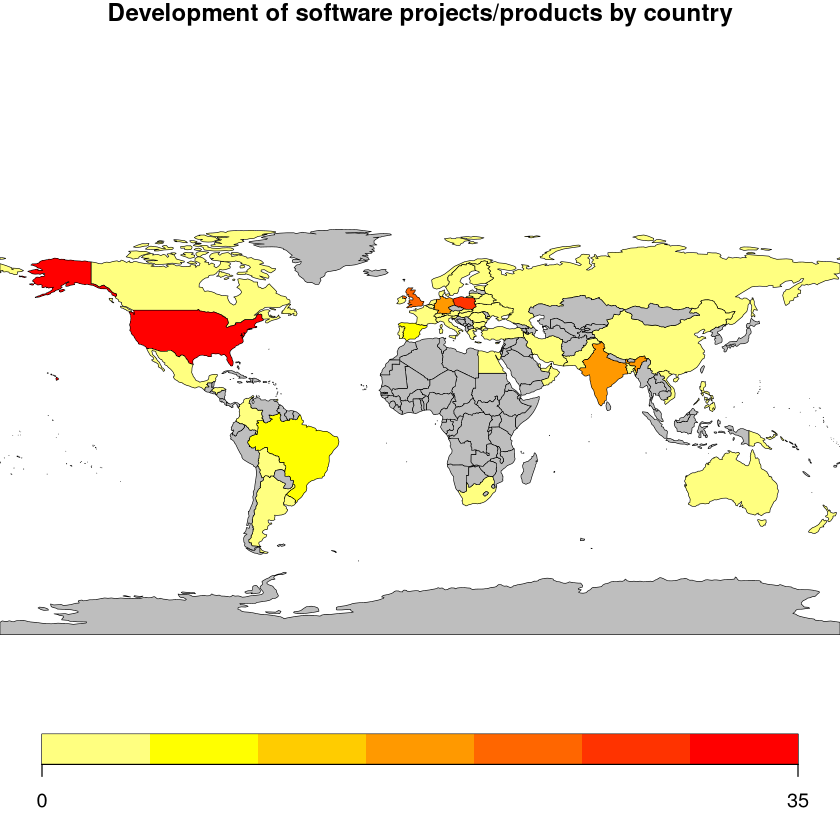

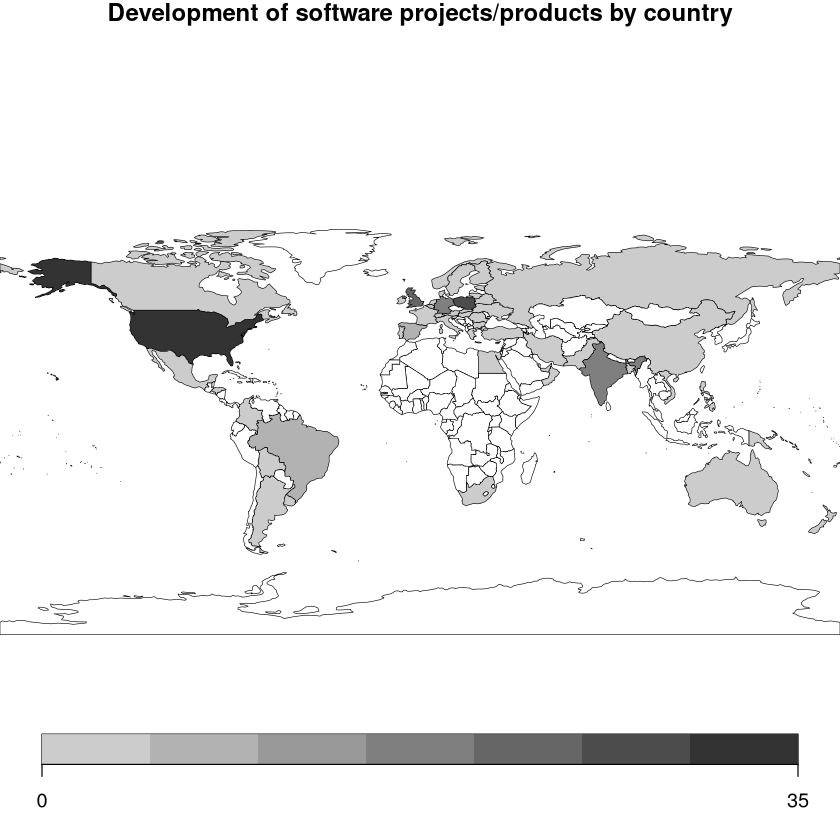

In [13]:
# Map of countries
colcountries = t(t(t(data[32:227])[,1]))
colnumber <- colSums(!is.na(data[32:227]))
table = t(t(colnumber))
table <- cbind(table, countries = colcountries)    
colnames(table) = c("number", "countries")
df <- as.data.frame(table)
df$number <- as.integer(df$number)
# Subtract 1 from every country because the country's name counted as 1
df[, 1] = df[, 1] - 1
# Remove rows with 0
df <- filter(df, number > 0)

df

mapped_data <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "countries")
par(mai=c(0,0,0.2,0),xaxs="i",yaxs="i")
mapCountryData(mapped_data, nameColumnToPlot = "number", missingCountryCol = "gray", borderCol = "black", catMethod = "pretty", colourPalette = "heat", mapTitle = "Development of software projects/products by country")
mapCountryData(mapped_data, nameColumnToPlot = "number", missingCountryCol = "white", borderCol = "black", catMethod = "pretty", colourPalette = "white2Black", mapTitle = "Development of software projects/products by country")

In [18]:
# Map of countries
# data[11:19]

colmet = t(t(t(data[11:19])[,1]))
colnumber <- colSums(!is.na(data[11:19]))
table = t(t(colnumber))
table <- cbind(table, countries = colmet)    
colnames(table) = c("number", "methodologies")
df <- as.data.frame(table)
df$number <- as.integer(df$number)
# Subtract 1 from every country because the country's name counted as 1
df[, 1] = df[, 1] - 1
# # Remove rows with 0


df

,number,methodologies
,<dbl>,<chr>
...11,94,Scrum
...12,4,PRINCE2
...13,19,Waterfall
...14,3,RUP
...15,0,DSDM
...16,35,Kanban
...17,0,Crystal Clear
...18,11,eXtreme Programming
...19,1,PSP


`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Unknown or uninitialised column: `labels`.”


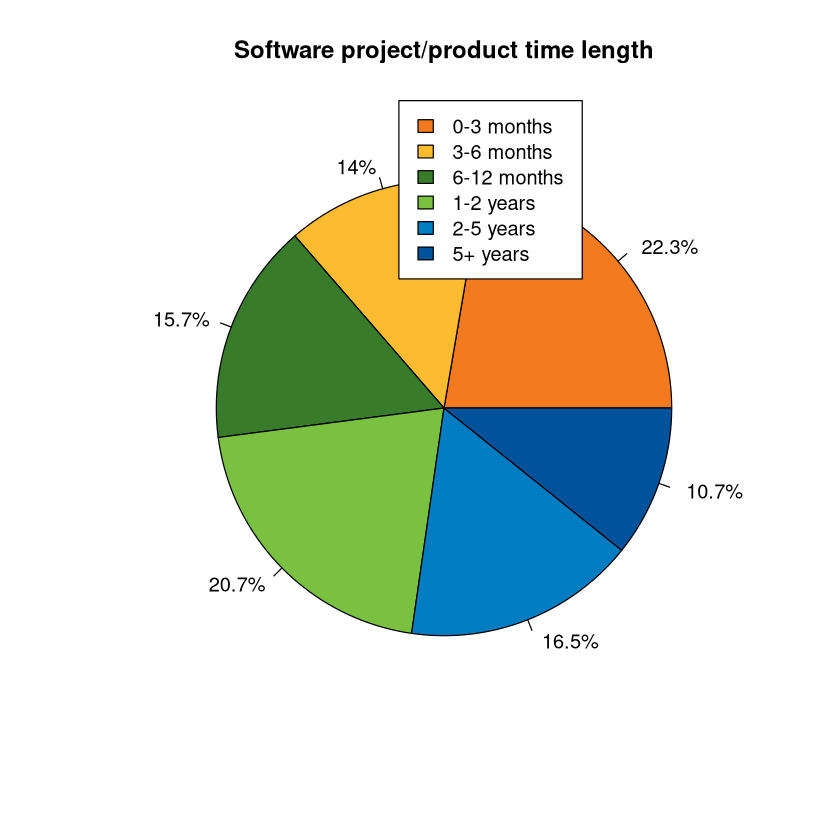

In [32]:
# Pizza chart with project duration
table <- data[21]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
df = df[order(factor(df$label, levels = c("0-3 months", "3-6 months", "6-12 months", "1-2 years", "2-5 years", "5+ years"))),]
piepercent <- round(100*df$number/sum(df$number), 1)
lbls <- paste(df$labels, piepercent) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
# rainbow(length(df$number))
colors = c("#F47A1F", "#FDBB2F", "#377B2B", "#7AC142", "#007CC3", "#00529B")
# colors

# df

pie(df$number, labels = lbls, main = "Software project/product time length", col = colors)
legend("topright", df$label, cex = 1, fill = colors, inset=c(0.3,0))

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Unknown or uninitialised column: `labels`.”


label,number
<chr>,<int>
Web application,48
Web services/SOA,25
Other (please specify),14
Mobile Application,9
Desktop application client-server,8
Desktop application standalone,5
Embedded,5
IoT (Internet of Things) system,3
Database,2


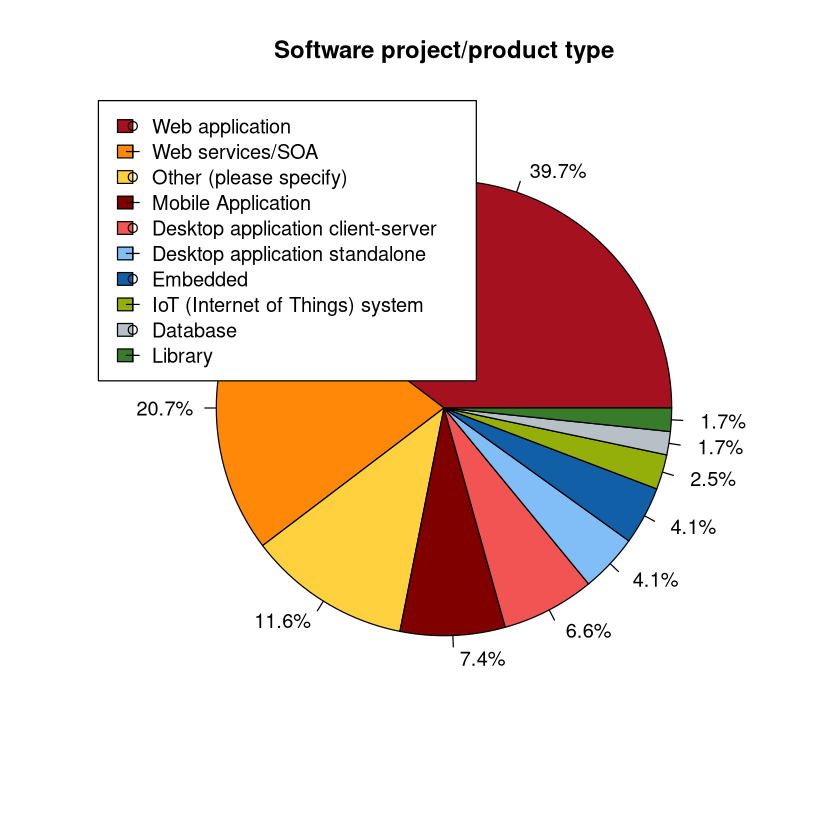

In [46]:
# Pizza chart with project type
table <- data[22]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
piepercent <- round(100*df$number/sum(df$number), 1)
lbls <- paste(df$labels, piepercent) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

# Original name is too big
df[1,1] = "Web application"
df[2,1] = "Web services/SOA"

df

colors = c("#a5111f", "#ff8808", "#ffd13e", "#800000", "#f25453", "#81bef7", "#115fa7", "#94af09", "#b6c0c6", "#377B2B")

pie(df$number, labels = lbls, main = "Software project/product type", col = colors)
legend("topleft",xpd=NA,  df$label, cex = 1, fill = colors, pch=c(1,3))

In [2]:
# table with project sector
table <- data[24]
other <- (data[25])
other = other[complete.cases(other),]
other
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
df

...25
<chr>
Other (please specify)
Youth employment
Semiconductor
All of the above?
Logistic & Smart City
No industry-specific (applies to all)
Video service
Culture


`summarise()` ungrouping output (override with `.groups` argument)



label,number
<chr>,<int>
Finance/ Banking/ Insurance,24
Information Technology,19
Government,12
Medical & health care,7
Other (please specify),7
Telecommunication,7
Travelling,5
Aviation,4
Electronics & computer,3


In [3]:
# table with project impact
table <- data[26]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df1 <-df[order(df$"label", decreasing = TRUE),]
# df1

table <- data[27]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df2 <-df[order(df$"label", decreasing = TRUE),]
# df2

table <- data[28]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df3 <-df[order(df$"label", decreasing = TRUE),]
# df3

df = cbind(df1$label,df1$number,df2$number,df3$number)

colnames(df) = c("Impact", "Human life or health is in danger", "Environment is harmed", "Economic loss is present")
df


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



Impact,Human life or health is in danger,Environment is harmed,Economic loss is present
N/A,61,62,6
Medium,15,10,32
Low,34,31,29
High,11,18,54


`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Unknown or uninitialised column: `labels`.”


label,number
<chr>,<int>
Micro (1-10 persons),15
Small (11-50 persons),26
Medium (51-250 persons),36
Large (250+ persons),44


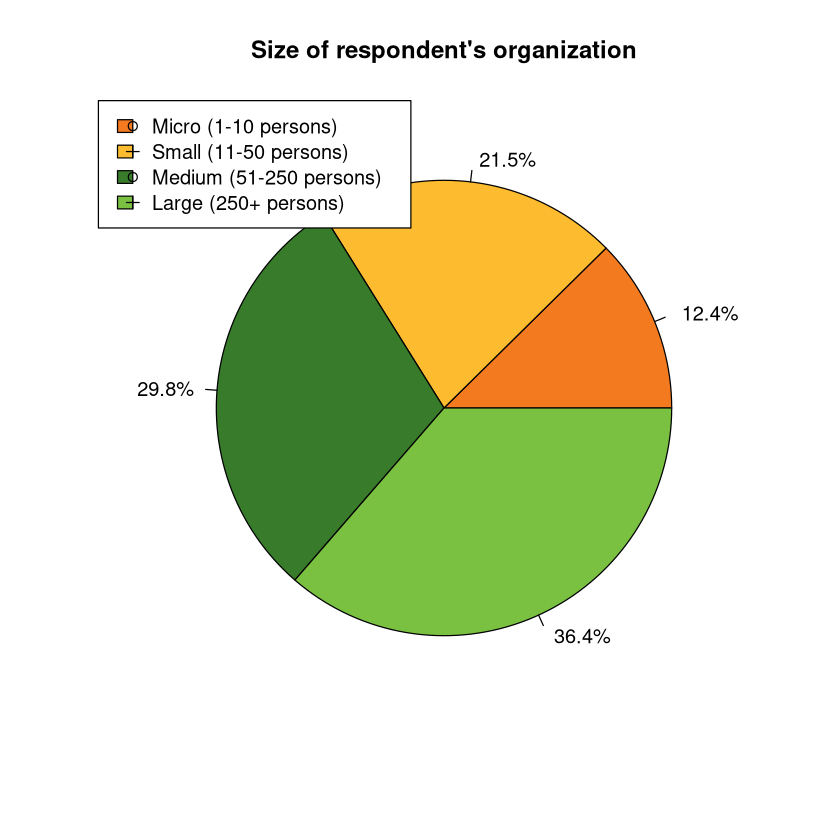

In [33]:
# Pizza chart with organization size
table <- data[29]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
df = df[order(factor(df$label, levels = c("Micro (1-10 persons)", "Small (11-50 persons)", "Medium (51-250 persons)", "Large (250+ persons)"))),]
piepercent <- round(100*df$number/sum(df$number), 1)
lbls <- paste(df$labels, piepercent) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

colors = c("#F47A1F", "#FDBB2F", "#377B2B", "#7AC142")
df

pie(df$number, labels = lbls, main = "Size of respondent's organization", col = colors)
legend("topleft",xpd=NA,  df$label, cex = 1, fill = colors, pch=c(1,3))

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Unknown or uninitialised column: `labels`.”


[1] " 2.5%"  " 44.6%" " 27.3%" " 9.1%"  " 16.5%"

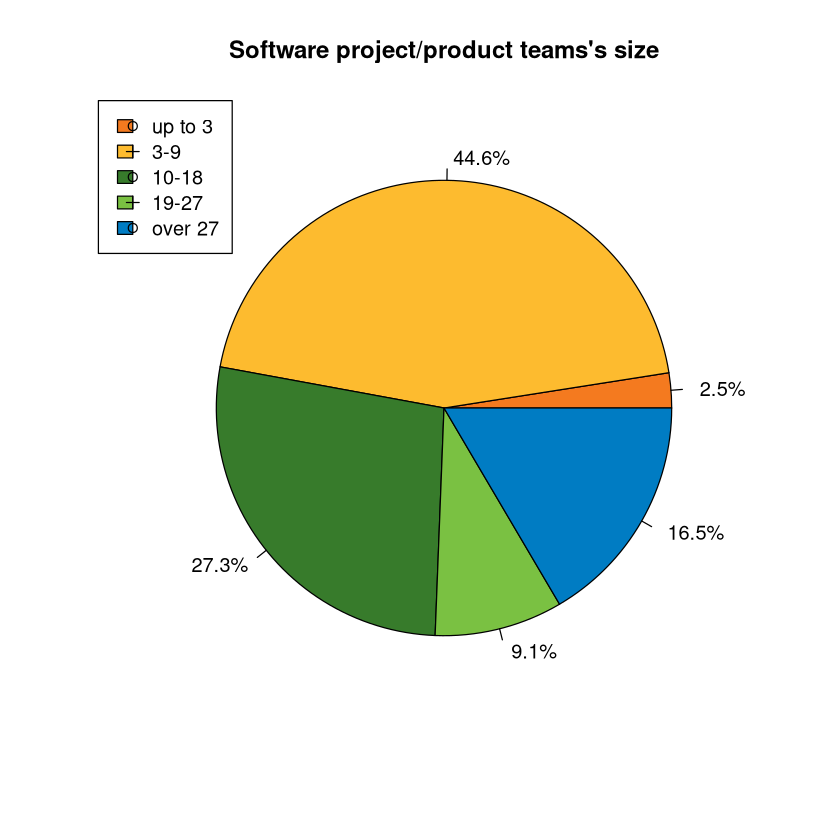

In [24]:
# Pizza chart with team size
table <- data[30]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
df = df[order(factor(df$label, levels = c("up to 3", "3-9", "10-18", "19-27", "over 27"))),]
piepercent <- round(100*df$number/sum(df$number), 1)
lbls <- paste(df$labels, piepercent) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

colors = c("#F47A1F", "#FDBB2F", "#377B2B", "#7AC142", "#007CC3")
lbls


pie(df$number, labels = lbls, main = "Software project/product teams's size", col = colors)
legend("topleft",xpd=NA,  df$label, cex = 1, fill = colors, pch=c(1,3))

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Unknown or uninitialised column: `labels`.”


label,number
<chr>,<int>
Working from different sites or remotely,93
Team on the same site,28


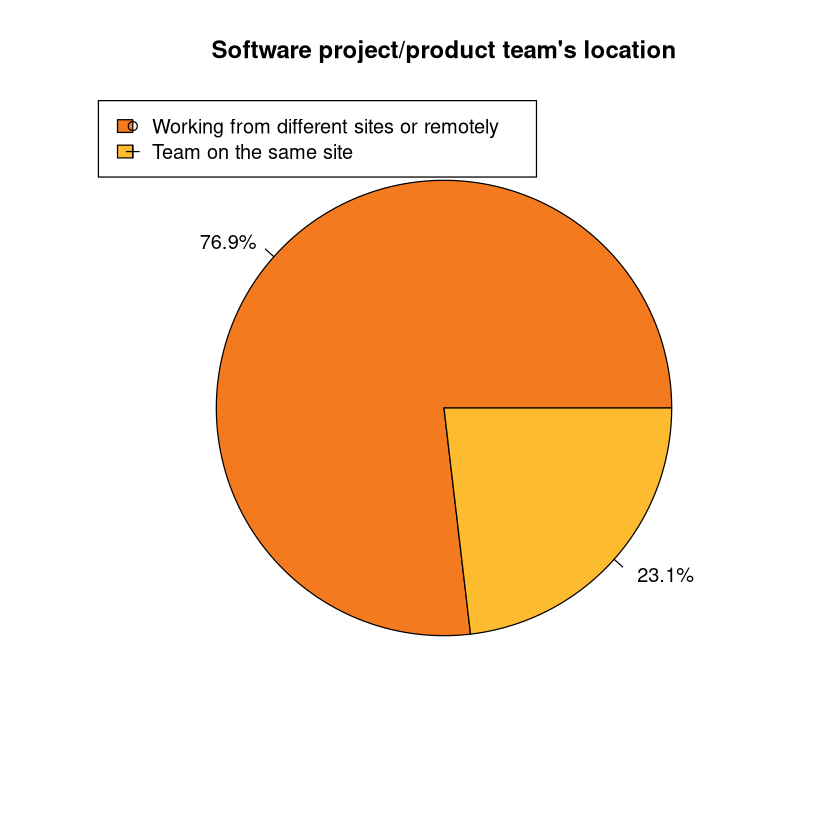

In [51]:
# Pizza chart with remote work
table <- data[31]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
piepercent <- round(100*df$number/sum(df$number), 1)
lbls <- paste(df$labels, piepercent) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

df[1,1] = "Working from different sites or remotely"
df[2,1] = "Team on the same site"

colors = c("#F47A1F", "#FDBB2F")

df


pie(df$number, labels = lbls, main = "Software project/product team's location", col = colors)
legend("topleft",xpd=NA,  df$label, cex = 1, fill = colors, pch=c(1,3))

In [46]:
# Role
colcountries = t(t(t(data[228:241])[,1]))
colnumber <- colSums(!is.na(data[228:241]))
data[241][complete.cases(data[241]),]
table = t(t(colnumber))
table <- cbind(table, countries = colcountries)    
colnames(table) = c("number", "role")
df <- as.data.frame(table)
df$number <- as.integer(df$number)
# Subtract 1 from every country because the country's name counted as 1
df[, 1] = df[, 1] - 1
# Remove rows with 0
df <- filter(df, number > 0)
df <-df[order(df$number, decreasing = TRUE),]
df

# mapped_data <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "countries")
# par(mai=c(0,0,0.2,0),xaxs="i",yaxs="i")
# mapCountryData(mapped_data, nameColumnToPlot = "number", missingCountryCol = "gray", borderCol = "black", catMethod = "pretty", colourPalette = "heat", mapTitle = "Title Here")
# mapCountryData(mapped_data, nameColumnToPlot = "number", missingCountryCol = "white", borderCol = "black", catMethod = "pretty", colourPalette = "white2Black", mapTitle = "Title Here")

...241
<chr>
Other (please specify)
Technical Leader
Test Automation Engineer
SDET
IT Consultant and QA lead
Full stack
Product quality engineer and software tester
"Build Management, Technical Release Management"
Software developer in test


,number,role
,<dbl>,<chr>
...1,45,Tester / Test engineer / QA engineer
...4,41,Developer / Software engineer
...11,25,Architect
...2,21,Test manager
...3,15,Quality assurance representative
...12,15,DevOps
...14,13,Other (please specify)
...5,11,Scrum Master
...8,11,Middle management


`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Unknown or uninitialised column: `labels`.”


label,number
<chr>,<int>
up to 1 year,2
1-2 years,7
3-5 years,12
5-10 years,28
10+ years,72


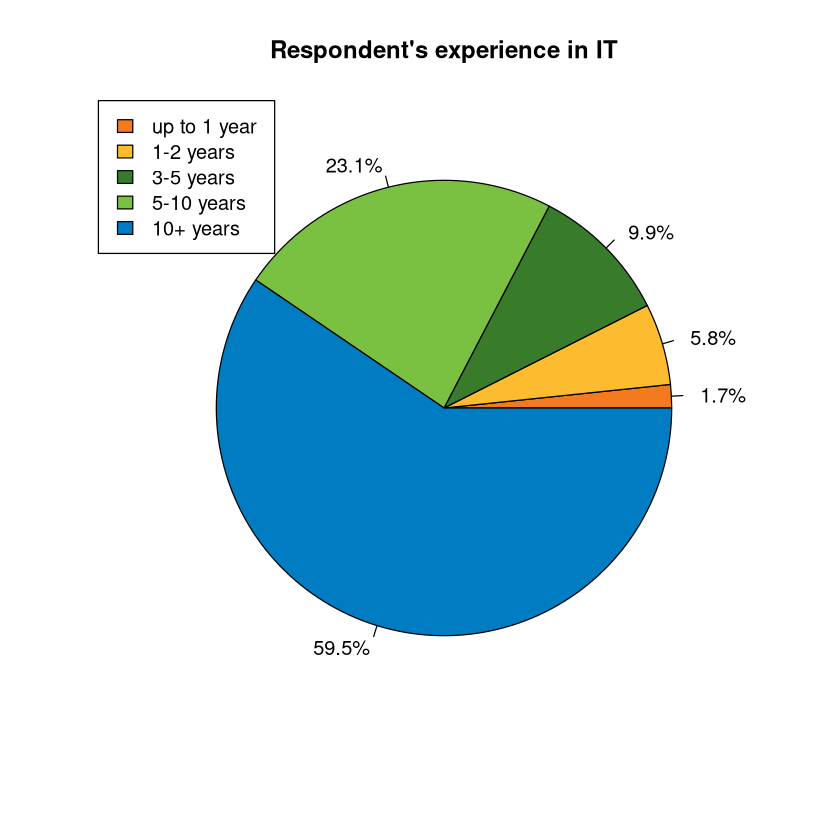

In [34]:
# Pizza chart with years of exp in IT
table <- data[242]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
df = df[order(factor(df$label, levels = c("up to 1 year", "1-2 years", "3-5 years", "5-10 years", "10+ years"))),]
piepercent <- round(100*df$number/sum(df$number), 1)
lbls <- paste(df$labels, piepercent) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

colors = c("#F47A1F", "#FDBB2F", "#377B2B", "#7AC142", "#007CC3")

df

pie(df$number, labels = lbls, main = "Respondent's experience in IT", col = colors)
legend("topleft",xpd=NA,  df$label, cex = 1, fill = colors)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Unknown or uninitialised column: `labels`.”


label,number
<chr>,<int>
up to 1 year,14
1-2 years,16
3-5 years,23
5-10 years,25
10+ years,43


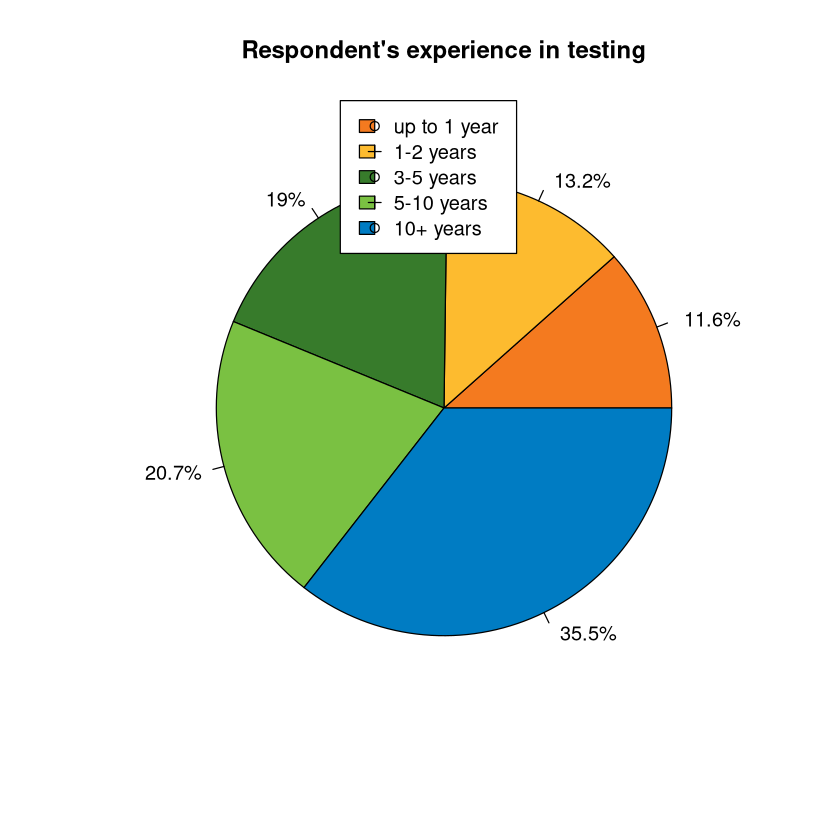

In [43]:
# Pizza chart with years of exp in testing
table <- data[243]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <-df[order(df$number, decreasing = TRUE),]
df = df[order(factor(df$label, levels = c("up to 1 year", "1-2 years", "3-5 years", "5-10 years", "10+ years"))),]
piepercent <- round(100*df$number/sum(df$number), 1)
lbls <- paste(df$labels, piepercent) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels

colors = c("#F47A1F", "#FDBB2F", "#377B2B", "#7AC142", "#007CC3")

df

pie(df$number, labels = lbls, main = "Respondent's experience in testing", col = colors)
legend("topleft",xpd=NA,  df$label, cex = 1, fill = colors, pch=c(1,3), inset=c(0.35,0))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



label,Category,I don't know,Not tested,Definitely low,Rather low,Neither low nor high,Rather high,Definitely high
number,Security,4,10,9,23,20,26,29
,Usability,8,18,10,12,17,41,15
,Availability,7,31,10,10,15,21,27
,Fault Tolerance,15,37,8,13,18,17,13
,Recoverability,18,37,13,13,12,11,17
,Performance,8,14,13,7,19,31,29
,Portability,18,62,15,6,9,6,5
,Maintainability,20,44,8,5,16,12,16
,Co-existence,22,60,7,10,8,9,5
,Interoperability,22,28,8,13,9,21,20


[1] "#A9A9A9" "#F46D43" "#FDAE61" "#FEE08B" "#DFDFDF" "#D9EF8B" "#A6D96A"

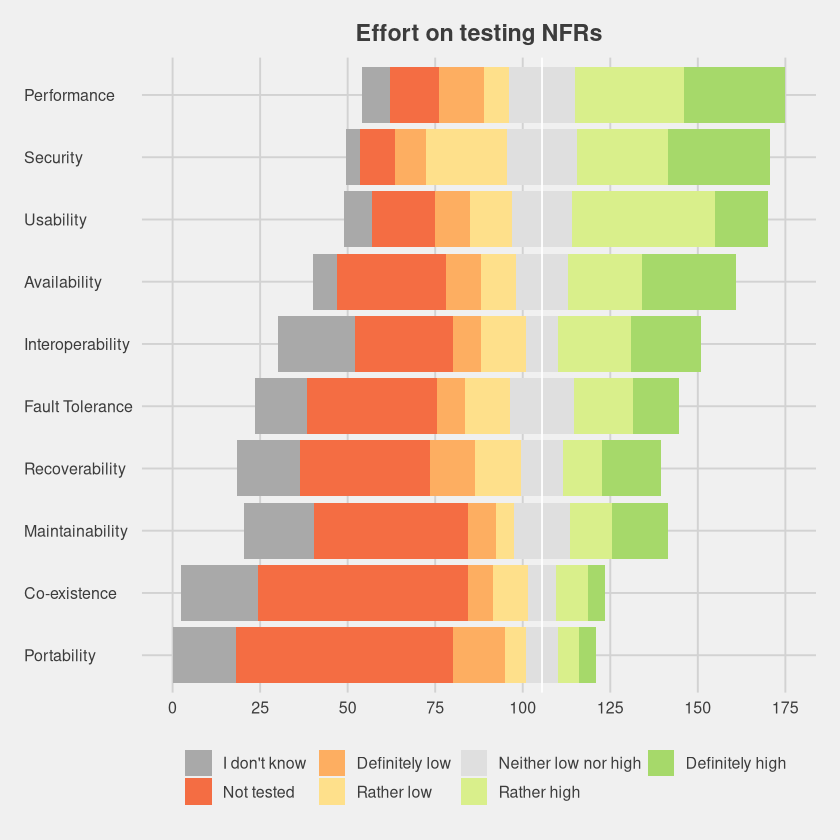

In [15]:
# likert scale on testing
# http://rnotr.com/likert/ggplot/barometer/likert-plots/

table <- data[244]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Security"
df1 <- df

table <- data[302]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Usability"
df1 <- rbind(df1,df[2,])

table <- data[366]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Availability"
df1 <- rbind(df1,df[2,])

table <- data[415]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Fault Tolerance"
df1 <- rbind(df1,df[2,])

table <- data[464]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Recoverability"
df1 <- rbind(df1,df[2,])

table <- data[513]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Performance"
df1 <- rbind(df1,df[2,])

table <- data[562]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Portability"
df1 <- rbind(df1,df[2,])

table <- data[611]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Maintainability"
df1 <- rbind(df1,df[2,])

table <- data[660]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Co-existence"
df1 <- rbind(df1,df[2,])

table <- data[709]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df <- df[order(factor(df$label, levels = c("I don't know", "Not tested","Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Interoperability"
df1 <- rbind(df1,df[2,])
df1



tab<-df1
colnames = tab[1,]
tab = as.data.frame(tab)
tab = tab[-1,]
names(tab) = colnames
names(tab)[names(tab)=="Category"] = "outcome"
outcome = tab[,1]
tab = as.data.frame(apply(tab[,-1], 2, as.numeric)) 
tab = cbind(outcome,tab)
# tab = tab[,c(1,3,2,4:8)]

mytitle<-"Effort on testing NFRs"
mylevels = c("I don't know","Not tested" ,"Definitely low", "Rather low", "Neither low nor high", "Rather high", "Definitely high", "deleted", "deleted2")

tab <- cbind(tab, deleted=c(0,0,0,0,0,0,0,0,0,0), deleted2=c(0,0,0,0,0,0,0,0,0,0))

numlevels<-length(tab[1,])-1
numcenter<-ceiling(numlevels/2)+1
tab$midvalues<-tab[,numcenter]/2
tab2<-cbind(tab[,1],tab[,2:ceiling(numlevels/2)],
  tab$midvalues,tab$midvalues,tab[,numcenter:numlevels+1])
colnames(tab2)<-c("outcome",mylevels[1:floor(numlevels/2)],"midlow",
  "midhigh",mylevels[numcenter:numlevels])

numlevels<-length(mylevels)+1
point1<-2
point2<-((numlevels)/2)+1
point3<-point2+1
point4<-numlevels+1
# mymin<-(ceiling(max(rowSums(tab2[,point1:point2]))*4)/4)*100
mymin<-(ceiling(max(rowSums(tab2[,point1:point2]))*4)/4)*-100
mymax<-(ceiling(max(rowSums(tab2[,point3:point4]))*4)/4)*100

numlevels<-length(tab[1,])-1
temp.rows<-length(tab2[,1])
pal<-brewer.pal((numlevels-1),"RdYlGn")
pal[ceiling(numlevels/2)]<-"#DFDFDF"
pal[1] = "#A9A9A9"
legend.pal<-pal
pal<-c(pal[1:(ceiling(numlevels/2)-1)], pal[ceiling(numlevels/2)], 
       pal[ceiling(numlevels/2)], pal[(ceiling(numlevels/2)+1):(numlevels-1)])

tab3<-melt(tab2,id="outcome")
tab3$col<-rep(pal,each=temp.rows)
tab3$value<-tab3$value*100
tab3$outcome<-str_wrap(tab3$outcome, width = 40)
# tab3$outcome<-factor(tab3$outcome, levels = tab2$outcome[order(-(tab2[,5]+tab2[,6]+tab2[,7]))])
tab3$outcome<-factor(tab3$outcome, levels = tab2$outcome[order(factor(tab2$outcome, levels = c("Portability", "Co-existence", "Maintainability", "Recoverability", "Fault Tolerance", "Interoperability", "Availability", "Usability", "Security", "Performance")))])
highs<-na.omit(tab3[(length(tab3[,1])/2)+1:length(tab3[,1]),])
lows<-na.omit(tab3[1:(length(tab3[,1])/2),])
lows <- lows[rev(rownames(lows)),]


legend.pal = head(legend.pal, -2)
mylevels = head(mylevels, -2)

# (-mymin+mymax)/4

# lows

legend.pal
# legend.pal[1] = "#A9A9A9"
# legend

ggplot() +
geom_bar(data=highs, aes(x = outcome, y=value, fill=factor(col, levels = legend.pal)),position=position_stack(reverse = TRUE), stat="identity") +
geom_bar(data=lows, aes(x = outcome, y=-value, fill=factor(col, levels = legend.pal)), position='stack', stat="identity") +
geom_hline(yintercept = 0, color =c("white")) +
scale_fill_identity("", labels = mylevels, breaks=legend.pal, guide="legend") +
theme_fivethirtyeight() +
coord_flip() +
labs(title=mytitle, y="",x="") +
theme(plot.title = element_text(size=14, hjust=0.5)) +
theme(axis.text.y = element_text(hjust=0)) +
theme(legend.position = "bottom") +
# scale_y_continuous(breaks=seq(mymin,mymax,25), limits=c(mymin,mymax))
# scale_y_continuous(breaks=seq(mymin,mymax,2500), limits=c(mymin,mymax))
scale_y_continuous(breaks=seq(mymin,mymax,2500), limits=c(mymin,mymax), labels = c("0", "25", "50", "75", "100", "125", "150", "175"))
# scale_y_continuous(breaks=seq(0,116,29), limits=c(0,116))

In [118]:
# Table why not tested all categories
colClasses = c("character", "integer", "integer", "integer", "integer", "integer", "integer", "integer", "integer", "integer")
col.names = c("Category","No requirements concerning", "Too complicated", "High cost", "Too little time", "More knowledge would be needed", "Tools did not suit our needs", "Lack of testing culture", "Management decision", "Other (please specify)")
dfFinal <- read.table(text = "", colClasses = colClasses, col.names = col.names)

df = as.data.frame(data[291:298])
dfOther = as.data.frame(data[299])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Security",values,other)

df = as.data.frame(data[355:362])
dfOther = as.data.frame(data[363])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Usability",values,other)

df = as.data.frame(data[404:411])
dfOther = as.data.frame(data[412])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Availability",values,other)

df = as.data.frame(data[453:460])
dfOther = as.data.frame(data[461])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Fault Tolerance",values,other)

df = as.data.frame(data[502:509])
dfOther = as.data.frame(data[510])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Recoverability",values,other)

df = as.data.frame(data[551:558])
dfOther = as.data.frame(data[559])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Performance",values,other)

df = as.data.frame(data[600:607])
dfOther = as.data.frame(data[608])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Portability",values,other)

df = as.data.frame(data[649:656])
dfOther = as.data.frame(data[657])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Maintainability",values,other)

df = as.data.frame(data[698:705])
dfOther = as.data.frame(data[706])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Co-existence",values,other)

df = as.data.frame(data[747:754])
dfOther = as.data.frame(data[755])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Interoperability",values,other)

dfFinal[nrow(dfFinal) + 1, ] = cbind("ALL",sum(dfFinal$No.requirements.concerning),sum(dfFinal$Too.complicated) ,sum(dfFinal$High.cost) ,sum(dfFinal$Too.little.time) ,sum(dfFinal$More.knowledge.would.be.needed) ,sum(dfFinal$Tools.did.not.suit.our.needs) ,sum(dfFinal$Lack.of.testing.culture) ,sum(dfFinal$Management.decision),sum(dfFinal$Other..please.specify.))

dfFinal

,Category,No.requirements.concerning,Too.complicated,High.cost,Too.little.time,More.knowledge.would.be.needed,Tools.did.not.suit.our.needs,Lack.of.testing.culture,Management.decision,Other..please.specify.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Security,7,1,2,1,1,1,4,3,1
2,Usability,15,2,2,1,2,2,4,5,4
3,Availability,16,2,6,3,4,1,7,9,6
4,Fault Tolerance,27,5,4,5,4,2,9,9,7
5,Recoverability,28,6,4,2,5,2,8,10,5
6,Performance,9,3,4,4,1,1,5,5,3
7,Portability,52,4,3,3,2,2,5,6,10
8,Maintainability,31,2,4,8,8,2,12,6,5
9,Co-existence,48,2,5,4,3,2,5,5,9


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



nomes,Definitely Not Valuable,Rather Not Valuable,Neither Valuable nor Not Valuable,Rather Valuable,Definitely Valuable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Security,0.02777778,0.12962963,0.12037037,0.2592593,0.4629630
Usability,0.02105263,0.13684211,0.13684211,0.3157895,0.3894737
Availability,0.01204819,0.12048193,0.08433735,0.2891566,0.4939759
Fault Tolerance,0.01449275,0.11594203,0.20289855,0.2753623,0.3913043
Recoverability,0.06060606,0.12121212,0.19696970,0.1515152,0.4696970
Performance,0.01010101,0.07070707,0.12121212,0.2626263,0.5353535
Portability,0.14285714,0.21428571,0.14285714,0.2142857,0.2857143
Maintainability,0.01754386,0.08771930,0.19298246,0.2982456,0.4035088
Co-existence,0.05128205,0.15384615,0.17948718,0.3333333,0.2820513


[1] 9.923077

[1] -43.000000 -33.076923 -23.153846 -13.230769  -3.307692   6.615385
 [7]  16.538462  26.461538  36.384615  46.307692  56.230769  66.153846
[13]  76.076923  86.000000

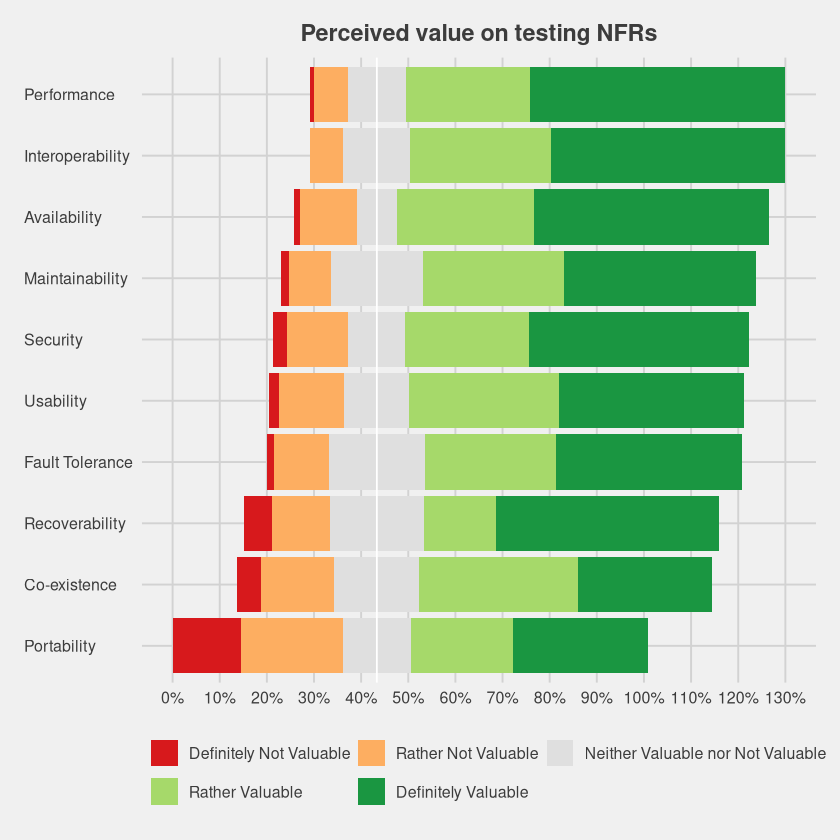

In [146]:
# likert scale on value
# http://rnotr.com/likert/ggplot/barometer/likert-plots/

table <- data[245]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Security"
df1 <- df

table <- data[303]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Usability"
df1 <- rbind(df1,df[2,])

table <- data[367]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Availability"
df1 <- rbind(df1,df[2,])

table <- data[416]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Fault Tolerance"
df1 <- rbind(df1,df[2,])

table <- data[465]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Recoverability"
df1 <- rbind(df1,df[2,])

table <- data[514]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Performance"
df1 <- rbind(df1,df[2,])

table <- data[563]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Portability"
df1 <- rbind(df1,df[2,])

table <- data[612]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Maintainability"
df1 <- rbind(df1,df[2,])

table <- data[661]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Co-existence"
df1 <- rbind(df1,df[2,])

table <- data[710]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable"))),]
df <- t(df)
# Definitely Not Valuable has 0
df <- cbind(c("Category"), c("Definitely Not Valuable"), df)
df[2,1] = "Interoperability"
df[2,2] = 0
df1 <- rbind(df1,df[2,])
# df1



tab<-df1
colnames = tab[1,]
tab = as.data.frame(tab)
tab = tab[-1,]
names(tab) = colnames
names(tab)[names(tab)=="Category"] = "outcome"
outcome = tab[,1]
tab = as.data.frame(apply(tab[,-1], 2, as.numeric)) 
tab = cbind(outcome,tab)
# tab = tab[,c(1,3,2,4:8)]

nomes = tab[,1]
# tab[,2:6]
tab<-as.matrix(tab[,2:6])
matnorm<-tab/rowSums(tab)
tab<-as.data.frame(matnorm)
tab <- cbind(nomes, tab)

tab

mytitle<-"Perceived value on testing NFRs"
mylevels = c("Definitely Not Valuable", "Rather Not Valuable","Neither Valuable nor Not Valuable", "Rather Valuable", "Definitely Valuable")

# tab <- cbind(tab, deleted=c(0,0,0,0,0,0,0,0,0,0), deleted2=c(0,0,0,0,0,0,0,0,0,0))

numlevels<-length(tab[1,])-1
numcenter<-ceiling(numlevels/2)+1
tab$midvalues<-tab[,numcenter]/2
tab2<-cbind(tab[,1],tab[,2:ceiling(numlevels/2)],
  tab$midvalues,tab$midvalues,tab[,numcenter:numlevels+1])
colnames(tab2)<-c("outcome",mylevels[1:floor(numlevels/2)],"midlow",
  "midhigh",mylevels[numcenter:numlevels])

numlevels<-length(mylevels)+1
point1<-2
point2<-((numlevels)/2)+1
point3<-point2+1
point4<-numlevels+1
mymin<-(ceiling(max(rowSums(tab2[,point1:point2]))*4)/4)*-100
mymax<-(ceiling(max(rowSums(tab2[,point3:point4]))*4)/4)*100

numlevels<-length(tab[1,])-1
temp.rows<-length(tab2[,1])
pal<-brewer.pal((numlevels-1),"RdYlGn")
pal[ceiling(numlevels/2)]<-"#DFDFDF"
legend.pal<-pal
pal<-c(pal[1:(ceiling(numlevels/2)-1)], pal[ceiling(numlevels/2)], 
       pal[ceiling(numlevels/2)], pal[(ceiling(numlevels/2)+1):(numlevels-1)])

tab3<-melt(tab2,id="outcome")
tab3$col<-rep(pal,each=temp.rows)
tab3$value<-tab3$value*100
tab3$outcome<-str_wrap(tab3$outcome, width = 40)
# tab3$outcome<-factor(tab3$outcome, levels = tab2$outcome[order(-(tab2[,5]+tab2[,6]+tab2[,7]))])
tab3$outcome<-factor(tab3$outcome, levels = tab2$outcome[order(factor(tab2$outcome, levels = c("Portability", "Co-existence", "Recoverability", "Fault Tolerance", "Usability", "Security","Maintainability","Availability","Interoperability", "Performance")))])
highs<-na.omit(tab3[(length(tab3[,1])/2)+1:length(tab3[,1]),])
lows<-na.omit(tab3[1:(length(tab3[,1])/2),])
lows <- lows[rev(rownames(lows)),]


# legend.pal = head(legend.pal, -2)
# mylevels = head(mylevels, -2)

# (mymax-mymin)/9
mymax = 86
mymin = -43

div = (mymax-mymin)/13
div
seq(mymin,mymax,div)

# seq(mymin,mymax,1550)
lab = c("0%", "10%","20%","30%", "40%","50%", "60%","70%", "80%","90%", "100%", "110%", "120%", "130%")

ggplot() +
geom_bar(data=highs, aes(x = outcome, y=value, fill=factor(col, levels = legend.pal)),position=position_stack(reverse = TRUE), stat="identity") +
geom_bar(data=lows, aes(x = outcome, y=-value, fill=factor(col, levels = legend.pal)), position='stack', stat="identity") +
geom_hline(yintercept = 0, color =c("white")) +
scale_fill_identity("", labels = mylevels, breaks=legend.pal, guide="legend") +
theme_fivethirtyeight() +
coord_flip() +
labs(title=mytitle, y="",x="") +
theme(plot.title = element_text(size=14, hjust=0.5)) +
theme(axis.text.y = element_text(hjust=0)) +
theme(legend.position = "bottom") +
guides(fill=guide_legend(nrow=2,byrow=TRUE)) +
# scale_y_continuous(breaks=seq(mymin,mymax,25), limits=c(mymin,mymax))
scale_y_continuous(breaks=seq(mymin,mymax,div), limits=c(mymin,mymax), labels = lab)

In [237]:
# Table challenges all categories
colClasses = c("character", "integer", "integer", "integer", "integer", "integer", "integer", "integer", "integer", "integer", "integer", "integer")
col.names = c("Category","Difficulty in specifying quantifiable requirements", "Difficulty in specifying tests", "Conflict between requirements", "Long time needed for testing", "High cost", "Lack of knowledge", "Lack of priority", "Lack of testing culture", "Available tools did not suit our needs", "None", "Other")
dfFinal <- read.table(text = "", colClasses = colClasses, col.names = col.names)

df = as.data.frame(data[280:289])
dfOther = as.data.frame(data[290])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Security",values,other)

df = as.data.frame(data[344:353])
dfOther = as.data.frame(data[354])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Usability",values,other)

df = as.data.frame(data[393:402])
dfOther = as.data.frame(data[403])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Availability",values,other)

df = as.data.frame(data[442:451])
dfOther = as.data.frame(data[452])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Fault Tolerance",values,other)

df = as.data.frame(data[491:500])
dfOther = as.data.frame(data[501])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Recoverability",values,other)

df = as.data.frame(data[540:549])
dfOther = as.data.frame(data[550])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Performance",values,other)

df = as.data.frame(data[589:598])
dfOther = as.data.frame(data[599])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Portability",values,other)

df = as.data.frame(data[638:647])
dfOther = as.data.frame(data[648])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Maintainability",values,other)

df = as.data.frame(data[687:696])
dfOther = as.data.frame(data[697])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Co-existence",values,other)

df = as.data.frame(data[736:745])
dfOther = as.data.frame(data[746])
values = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
other = as.integer(colSums(!is.na(dfOther))-1)
dfFinal[nrow(dfFinal) + 1, ] = cbind("Interoperability",values,other)

dfFinal[nrow(dfFinal) + 1, ] = cbind("ALL",t(colSums(dfFinal[2:12])))

dfFinal

,Category,Difficulty.in.specifying.quantifiable.requirements,Difficulty.in.specifying.tests,Conflict.between.requirements,Long.time.needed.for.testing,High.cost,Lack.of.knowledge,Lack.of.priority,Lack.of.testing.culture,Available.tools.did.not.suit.our.needs,None,Other
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Security,24,31,25,24,20,36,30,45,12,14,10
2,Usability,27,21,23,22,14,14,23,29,8,10,14
3,Availability,15,20,10,14,13,14,16,14,7,15,8
4,Fault Tolerance,22,20,7,18,15,17,13,15,6,14,4
5,Recoverability,20,10,6,17,13,15,17,17,10,13,2
6,Performance,24,23,12,36,21,17,19,21,15,14,5
7,Portability,6,9,3,6,6,6,7,7,5,14,2
8,Maintainability,16,15,11,10,6,15,10,12,5,12,4
9,Co-existence,6,5,4,5,11,6,9,8,2,11,4


In [7]:
# Table approaches all categories
df = as.data.frame(data[246:254])
security = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
# security
df =  as.data.frame(data[255])
security_open = df[complete.cases(df),]
security_open = t(t(security_open[-1]))
# security_open

df = as.data.frame(data[304:316])
usability = as.data.frame(t(apply(t(sapply(X = df[-1,], FUN = table)), 2, as.integer)))
usability
df =  as.data.frame(data[317])
usability_open = df[complete.cases(df),]
usability_open = t(t(usability_open[-1]))
# usability_open

df = as.data.frame(data[368])
availability_open = df[complete.cases(df),]
availability_open = t(t(availability_open[-1]))
show(availability_open)

df = as.data.frame(data[417])
faulttolerance_open = df[complete.cases(df),]
faulttolerance_open = t(t(faulttolerance_open[-1]))
# show(faulttolerance_open)

df = as.data.frame(data[466])
recoverability_open = df[complete.cases(df),]
recoverability_open = t(t(recoverability_open[-1]))
# show(recoverability_open)

df = as.data.frame(data[515])
performance_open = df[complete.cases(df),]
performance_open = t(t(performance_open[-1]))
# show(performance_open)

df = as.data.frame(data[564])
portability_open = df[complete.cases(df),]
portability_open = t(t(portability_open[-1]))
# portability_open

df = as.data.frame(data[613])
maintainability_open = df[complete.cases(df),]
maintainability_open = t(t(maintainability_open[-1]))
# maintainability_open

df = as.data.frame(data[662])
coexistence_open = df[complete.cases(df),]
coexistence_open = t(t(coexistence_open[-1]))
# coexistence_open

df = as.data.frame(data[711])
interoperability_open = df[complete.cases(df),]
interoperability_open = t(t(interoperability_open[-1]))
# show(interoperability_open)


...304.Experiment,...305.Observations,...306.Survey,...307.Interviews,...308.Alpha testing,...309.Beta testing,...310.Prototyping,...311.Focus group,...312.External expert review,...313.Internal expert review,...314.Heuristics,...315.Standard review,...316.Cognitive focus group review
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
40,49,19,29,30,37,42,27,16,35,12,28,7


      [,1]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [1,] "Canary health checks  Automated scripts"                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [1]:
# Table tools all categories
df =  as.data.frame(data[256])
security_open = df[complete.cases(df),]
security_open = t(t(security_open[-1]))
# security_open

df =  as.data.frame(data[318])
usability_open = df[complete.cases(df),]
usability_open = t(t(usability_open[-1]))
# show(usability_open)

df = as.data.frame(data[369])
availability_open = df[complete.cases(df),]
availability_open = t(t(availability_open[-1]))
# show(availability_open)

df = as.data.frame(data[418])
faulttolerance_open = df[complete.cases(df),]
faulttolerance_open = t(t(faulttolerance_open[-1]))
# show(faulttolerance_open)

df = as.data.frame(data[467])
recoverability_open = df[complete.cases(df),]
recoverability_open = t(t(recoverability_open[-1]))
# show(recoverability_open)

df = as.data.frame(data[516])
performance_open = df[complete.cases(df),]
performance_open = t(t(performance_open[-1]))
# show(performance_open)

df = as.data.frame(data[565])
portability_open = df[complete.cases(df),]
portability_open = t(t(portability_open[-1]))
# portability_open

df = as.data.frame(data[614])
maintainability_open = df[complete.cases(df),]
maintainability_open = t(t(maintainability_open[-1]))
# maintainability_open

df = as.data.frame(data[663])
coexistence_open = df[complete.cases(df),]
coexistence_open = t(t(coexistence_open[-1]))
# coexistence_open

df = as.data.frame(data[712])
interoperability_open = df[complete.cases(df),]
interoperability_open = t(t(interoperability_open[-1]))
# show(interoperability_open)


ERROR: Error in data[256]: object of type 'closure' is not subsettable


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message in rbind(df1, df[2, ]):
“number of columns of result is not a multiple of vector length (arg 2)”


[1] 146

[1] -87.500000 -63.166667 -38.833333 -14.500000   9.833333  34.166667  58.500000

[1] "0%"   "25%"  "50%"  "75%"  "100%" "125%" "150%"

nomes,Fully Manual,More Manually less Automated,50% Manually / 50% Automated,Less Manually More Automated,Fully Automated,midvalues
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Security,0.22222222,0.25000000,0.23148148,0.21296296,0.08333333,0.11574074
Usability,0.60000000,0.23157895,0.07368421,0.08421053,0.01052632,0.03684211
Availability,0.27710843,0.24096386,0.12048193,0.15662651,0.20481928,0.06024096
Fault Tolerance,0.36231884,0.18840580,0.18840580,0.17391304,0.08695652,0.09420290
Recoverability,0.42424242,0.22727273,0.16666667,0.10606061,0.07575758,0.08333333
Performance,0.16161616,0.14141414,0.23232323,0.27272727,0.19191919,0.11616162
Portability,0.59523810,0.04761905,0.11904762,0.11904762,0.11904762,0.05952381
Maintainability,0.43859649,0.24561404,0.14035088,0.14035088,0.03508772,0.07017544
Co-existence,0.05128205,0.28205128,0.17948718,0.15384615,0.33333333,0.08974359


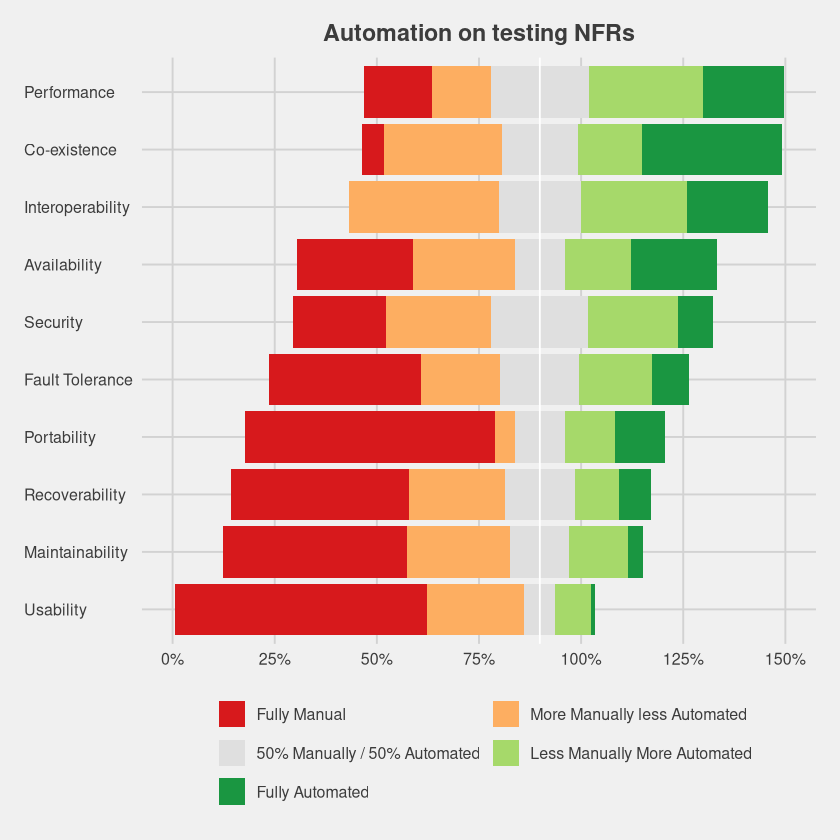

In [143]:
# Automated or manual testing
lvl = c("Fully Manual", "More Manually less Automated","50% Manually / 50% Automated", "Less Manually More Automated", "Fully Automated")


table <- data[257]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Security"
df1 <- df

# table <- data[303]
table <- data[319]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Usability"
df1 <- rbind(df1,df[2,])
# df1

# table <- data[367]
table <- data[370]
# table
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Availability"
df1 <- rbind(df1,df[2,])

table <- data[419]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Fault Tolerance"
df1 <- rbind(df1,df[2,])
# df1

table <- data[468]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Recoverability"
df1 <- rbind(df1,df[2,])

table <- data[517]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Performance"
df1 <- rbind(df1,df[2,])

table <- data[566]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Portability"
df1 <- rbind(df1,df[2,])

table <- data[615]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Maintainability"
df1 <- rbind(df1,df[2,])

table <- data[661]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
df <- cbind(c("Category"), df)
df[2,1] = "Co-existence"
df1 <- rbind(df1,df[2,])

table <- data[713]
colnames(table) = c("years")
# Removes first line which is "Response"
table = table[-1,]
df <- as.data.frame(table)
df <- df %>% group_by(df$years) %>% summarise(count = n())
colnames(df) <- c("label", "number")
df = df[complete.cases(df),]
df <- df[order(factor(df$label, levels = lvl)),]
df <- t(df)
# Definitely Not Valuable has 0
df <- cbind(c("Category"), c("Definitely Not Valuable"), df)
df[2,1] = "Interoperability"
df[2,2] = 0
df1 <- rbind(df1,df[2,])
# df1



tab<-df1
colnames = tab[1,]
tab = as.data.frame(tab)
tab = tab[-1,]
names(tab) = colnames
names(tab)[names(tab)=="Category"] = "outcome"
outcome = tab[,1]
tab = as.data.frame(apply(tab[,-1], 2, as.numeric)) 
tab = cbind(outcome,tab)
# tab = tab[,c(1,3,2,4:8)]

nomes = tab[,1]
# tab[,2:6]
tab<-as.matrix(tab[,2:6])
matnorm<-tab/rowSums(tab)
tab<-as.data.frame(matnorm)
tab <- cbind(nomes, tab)
# tab

mytitle<-"Automation on testing NFRs"
mylevels = lvl

# tab <- cbind(tab, deleted=c(0,0,0,0,0,0,0,0,0,0), deleted2=c(0,0,0,0,0,0,0,0,0,0))

numlevels<-length(tab[1,])-1
numcenter<-ceiling(numlevels/2)+1
tab$midvalues<-tab[,numcenter]/2
tab2<-cbind(tab[,1],tab[,2:ceiling(numlevels/2)],
  tab$midvalues,tab$midvalues,tab[,numcenter:numlevels+1])
colnames(tab2)<-c("outcome",mylevels[1:floor(numlevels/2)],"midlow",
  "midhigh",mylevels[numcenter:numlevels])

numlevels<-length(mylevels)+1
point1<-2
point2<-((numlevels)/2)+1
point3<-point2+1
point4<-numlevels+1
mymin<-(ceiling(max(rowSums(tab2[,point1:point2]))*4)/4)*-100
mymax<-(ceiling(max(rowSums(tab2[,point3:point4]))*4)/4)*100

numlevels<-length(tab[1,])-1
temp.rows<-length(tab2[,1])
pal<-brewer.pal((numlevels-1),"RdYlGn")
pal[ceiling(numlevels/2)]<-"#DFDFDF"
legend.pal<-pal
pal<-c(pal[1:(ceiling(numlevels/2)-1)], pal[ceiling(numlevels/2)], 
       pal[ceiling(numlevels/2)], pal[(ceiling(numlevels/2)+1):(numlevels-1)])

tab3<-melt(tab2,id="outcome")
tab3$col<-rep(pal,each=temp.rows)
tab3$value<-tab3$value*100
tab3$outcome<-str_wrap(tab3$outcome, width = 40)
# tab3$outcome<-factor(tab3$outcome, levels = tab2$outcome[order(-(tab2[,5]+tab2[,6]+tab2[,7]))])
tab3$outcome<-factor(tab3$outcome, levels = tab2$outcome[order(factor(tab2$outcome, levels = c(  "Usability","Maintainability","Recoverability","Portability","Fault Tolerance", "Security","Availability","Interoperability", "Co-existence","Performance")))])
highs<-na.omit(tab3[(length(tab3[,1])/2)+1:length(tab3[,1]),])
lows<-na.omit(tab3[1:(length(tab3[,1])/2),])
lows <- lows[rev(rownames(lows)),]


# legend.pal = head(legend.pal, -2)
# mylevels = head(mylevels, -2)

# tab

# (mymax-mymin)/7

# seq(mymin,mymax,1400)

# div = (mymax-mymin)/1
# div
# lab = c("0%")
# mymin
# mymax
mymin = -87.5
mymax = 58.5

div = (mymax-mymin)/6
lab = c("0%", "25%", "50%", "75%", "100%", "125%", "150%")
# lab = c("0%", "10%","20%","30%", "40%","50%", "60%","70%", "80%","90%", "100%", "110%", "120%", "130%", "140%", "150%")
mymax-mymin

seq(mymin,mymax,div)
lab

tab

ggplot() +
geom_bar(data=highs, aes(x = outcome, y=value, fill=factor(col, levels = legend.pal)),position=position_stack(reverse = TRUE), stat="identity") +
geom_bar(data=lows, aes(x = outcome, y=-value, fill=factor(col, levels = legend.pal)), position='stack', stat="identity") +
geom_hline(yintercept = 0, color =c("white")) +
scale_fill_identity("", labels = mylevels, breaks=legend.pal, guide="legend") +
theme_fivethirtyeight() +
coord_flip() +
labs(title=mytitle, y="",x="") +
theme(plot.title = element_text(size=14, hjust=0.5)) +
theme(axis.text.y = element_text(hjust=0)) +
theme(legend.position = "bottom") +
guides(fill=guide_legend(nrow=2,byrow=TRUE)) +
# scale_y_continuous(breaks=seq(mymin,mymax,25), limits=c(mymin,mymax))
guides(fill=guide_legend(nrow=3,byrow=TRUE)) +
scale_y_continuous(breaks=seq(mymin,mymax,div), limits=c(mymin,mymax), labels = lab)